# day 89

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import scipy.stats as stats

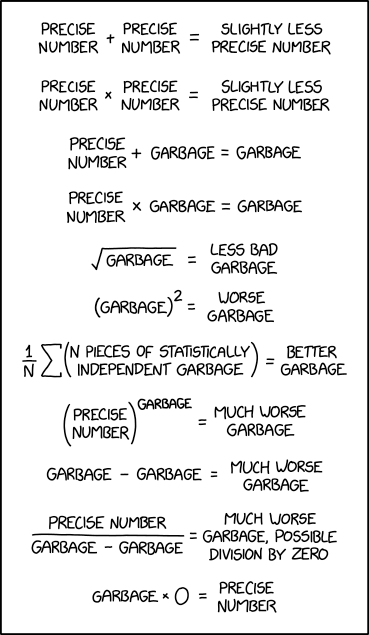

# Z Normalization:

# $$ Z_i = \frac{x_i - \bar{x}}{\sigma_x} $$


# conclusion:

Z_score works on only Guassian Distribution. for a non-guassian distribution it may not work as well. because we have the standard deviation underneath the equation which suits well on normally distributed data. median for skewed data and mode for many-peaks-and-troughs data. 

# day 91

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import scipy.stats as stats

# coding z score

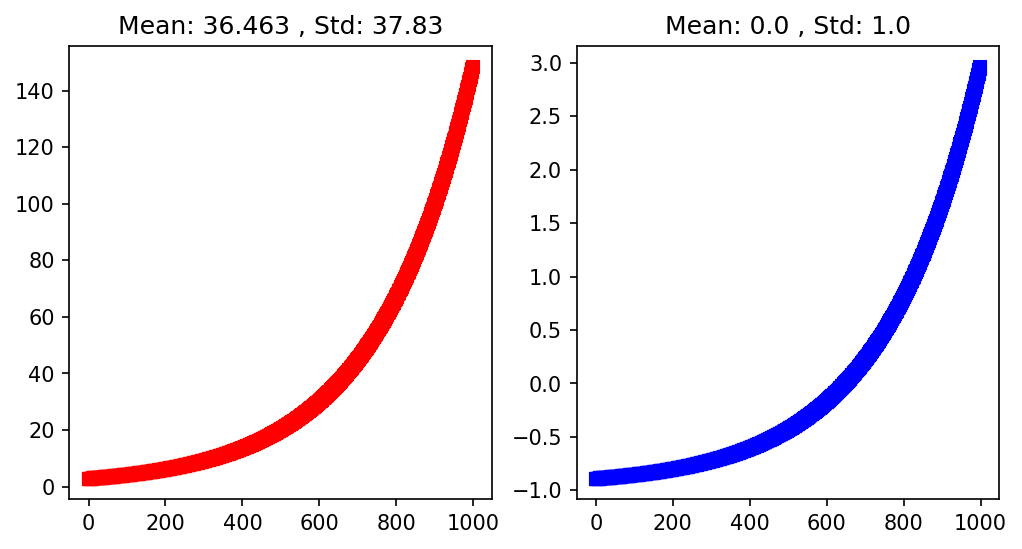

In [24]:
data = np.exp(np.linspace(1,5,1000))

# finding mean and standard deviatio of the data
mean = np.mean(data)
std = np.std(data)


# calculating the zscore

dataz = (data - mean)/std

meanz = np.mean(dataz)
stdz = np.std(dataz)


fig,ax = plt.subplots(1,2,figsize=(8,4),dpi=150)

ax[0].plot(data,'rs')
ax[0].set_title('Mean: %s , Std: %s'%(np.round(mean,3),np.round(std,3)))


ax[1].plot(dataz,'bs')
ax[1].set_title('Mean: %s , Std: %s'%(np.round(meanz,3),np.round(stdz,3)))

plt.show()

# conclusion:

zscore normalizes the data distribution. 


zscore makes the mean and std of any distribution become 0 and 1

# min-max scaling


it is about the scaling the data to a particular range. you can select the range. the original data can range between any numbers but the min-max scaled, the other name is normalization, data is going to range between 2 numbers of your choice. 


# formula

# $$ \text{normalized between 0 and 1 } = \frac{data_{i} - min(data)} {max(data) - min(data)} $$

Range = max(data) - min(data)

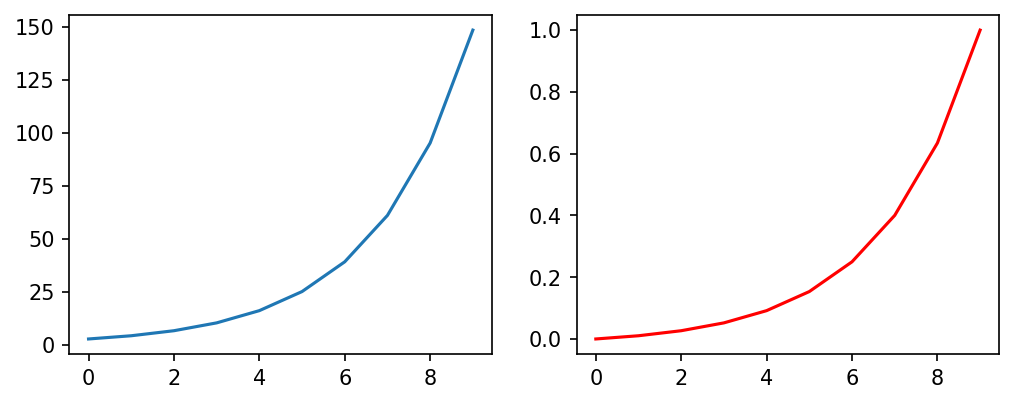

In [33]:
data = np.exp(np.linspace(1,5,10))

# normalizing between 0 and 1(unity normalization)
normalized_data = (data - min(data))/(max(data) - min(data))

fig,ax = plt.subplots(1,2,figsize=(8,3),dpi=150)
ax[0].plot(data)
ax[1].plot(normalized_data,'r')

plt.show()

In [31]:
data

array([  2.71828183,   4.23949621,   6.61201791,  10.3122585 ,
        16.08324067,  25.08380007,  39.121284  ,  61.01447378,
        95.159607  , 148.4131591 ])

In [29]:
normalized_data

array([0.        , 0.0104411 , 0.02672528, 0.05212247, 0.09173252,
       0.1535093 , 0.2498578 , 0.4001252 , 0.63448576, 1.        ])

# scaling to any arbitrary range


# step1: have the data normalized between 0 and 1.

# step2: apply this formula: normalized_data*(new_max - new_min) + new_min



In [34]:
new_min = 5
new_max= 15

new_range = normalized_data*(new_max - new_min) + new_min

new_range

array([ 5.        ,  5.10441097,  5.26725278,  5.52122469,  5.91732524,
        6.53509297,  7.49857805,  9.001252  , 11.34485762, 15.        ])

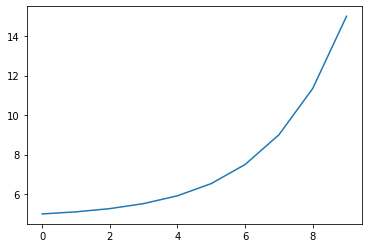

In [35]:
plt.plot(new_range)

plt.show()

# conclusion:

min works like mean of the data.




range(max-min) works like the standard deviation of the data. 


z score and min-max scaling or unity normalization are all connected. min works like mean and max-min works like standard deviation of the distribution. 

# day 92 and day 93 and day 94

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.signal import find_peaks

# outliers 


# why outliers are dangerous?

1. because when data points with outliers are squared make the outliers look really really large. 



2. if the outliers have become really large then all the methods such as the one that are mean or average dependant become less or no useful in predicting the mediocrity of the future. 


# how to deal with outliers?

1. remove them if they are insignificant. or too few in numbers.


2. else: have them in the data and use some robust methods such as the ones that are median dependant not mean dependepent to predict the mediocrity of the future. 


# threshold setting for filtering the outliers:

1. if the points in the data are beyond -3std or +3std

2. if the points in the data are beyond q1 - 1.5 * IQR or q3 + 1.5 * IQR

# Iterative Algorithms:

1. convert Data to Zscore.

2. A datapoint is an outlier if it exceeds 3 std . this is arbitrary. 

3. Remove outliers and repeat until no more outliers. 

# for non-normal distribution

1. convert the regualar z score into modified z score. it is useful for long-tailed distributions. 

# $$ \text{modified Z score } = \frac{0.6735(x-median)}{\text{MAD}} $$

# $$ \text{MAD} = abs(\sum_i^{n}{x_i-median}) $$

# creating a dataset with an outlier

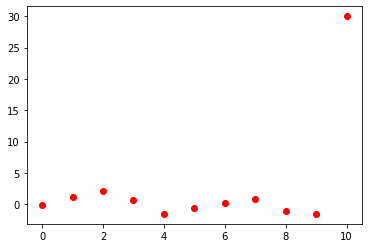

In [7]:
# random dataset with pos and neg values
data = np.random.randn(10)

# adding a positive outlier.
data = np.append(data,[30])

# plotting it
plt.plot(data,'ro')

plt.show()

# creating a data set with many outliers 

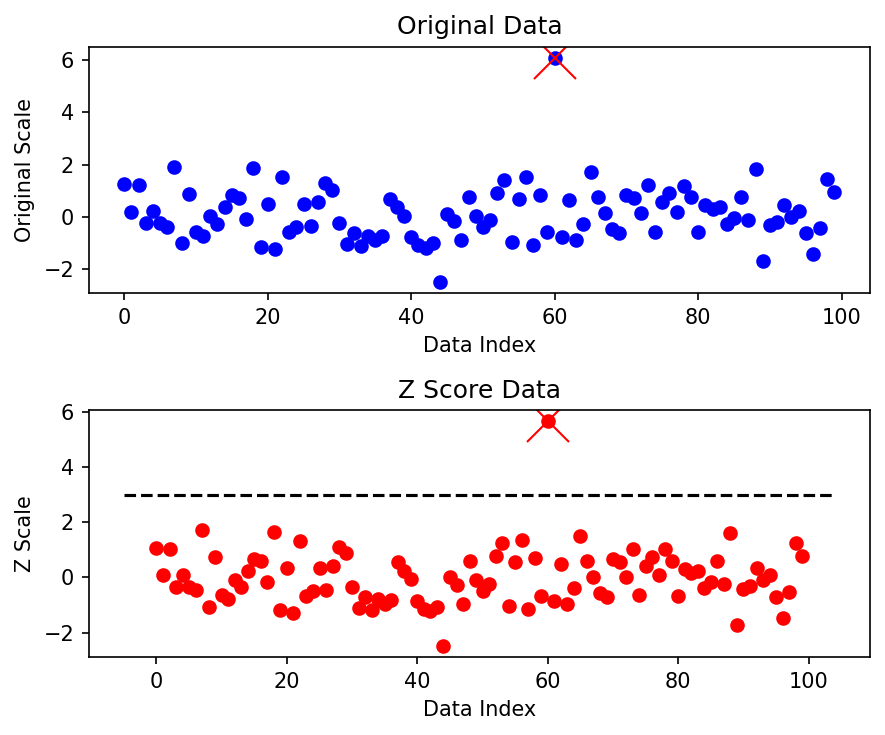

In [54]:
n = 100

data = np.random.randn(n)

# forcing some outliers in

#data[data<-1] = data[data<-1] + 2
data[data>2] = data[data>2] ** 2

# Zscore data
Zdata = (data-np.mean(data))/np.std(data)


# zscore threshold
threshold = 3

# plotting original data

fig, ax = plt.subplots(2,1,dpi=150,figsize=(6,5))

ax[0].plot(data,'bo')

ax[0].set_title('Original Data')
ax[0].set_xlabel('Data Index')
ax[0].set_ylabel('Original Scale')

# plotting Zdata

ax[1].plot(Zdata,'ro')

# drawing threshold
axes = plt.gca()

ax[1].plot(axes.get_xlim(),[threshold,threshold],'k--')


ax[1].set_title('Z Score Data')
ax[1].set_xlabel('Data Index')
ax[1].set_ylabel('Z Scale')

# marking outliers with x

outliers = np.where(abs(Zdata) > threshold)[0]
ax[0].plot(outliers,data[outliers],'x',color='red',markersize=20)
ax[1].plot(outliers,Zdata[outliers],'x',color='red',markersize=20)

plt.tight_layout()
plt.show()




In [15]:
axes.get_xlim()

In [22]:
Zdata[0:10]

array([-1.63220378,  0.85695005, -0.13302488,  1.06962294,  0.73312085,
       -0.46320117, -0.46192713, -0.03929676, -0.6016085 ,  0.48646623])

In [24]:
abs(Zdata)[0:10]

array([1.63220378, 0.85695005, 0.13302488, 1.06962294, 0.73312085,
       0.46320117, 0.46192713, 0.03929676, 0.6016085 , 0.48646623])

In [46]:
outliers = np.where(abs(Zdata) > threshold)[0]

outliers

array([14, 69], dtype=int64)

In [47]:
data[outliers]

array([ 8.63000967, 10.66985705])

In [48]:
Zdata[outliers]

array([4.97457869, 6.14658906])

In [57]:
a = np.arange(1,11,1)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [56]:
np.where(a<5)

(array([0, 1, 2, 3], dtype=int64),)

# conclusion:

#  np.where returns the index position of the values in the array given a condition passed.

# day 95

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.signal import find_peaks
import seaborn as sns
import sympy as sym
from IPython.display import display,Math
sym.init_printing()

# modified z score is suitable for non-normal distributions or skewed distributions

In [3]:
# this is known as point percent function.

# point percent function give the gives the value for quartiles.1st quartile is 0.25, 2nd is 0.5(median),third is 0.75

stats.norm.ppf(0.75) # 3rd quartile value. 

0.6744897501960817

In [6]:
help(stats.norm.ppf)

Help on method ppf in module scipy.stats._distn_infrastructure:

ppf(q, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Percent point function (inverse of `cdf`) at q of the given RV.
    
    Parameters
    ----------
    q : array_like
        lower tail probability
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    x : array_like
        quantile corresponding to the lower tail probability q.



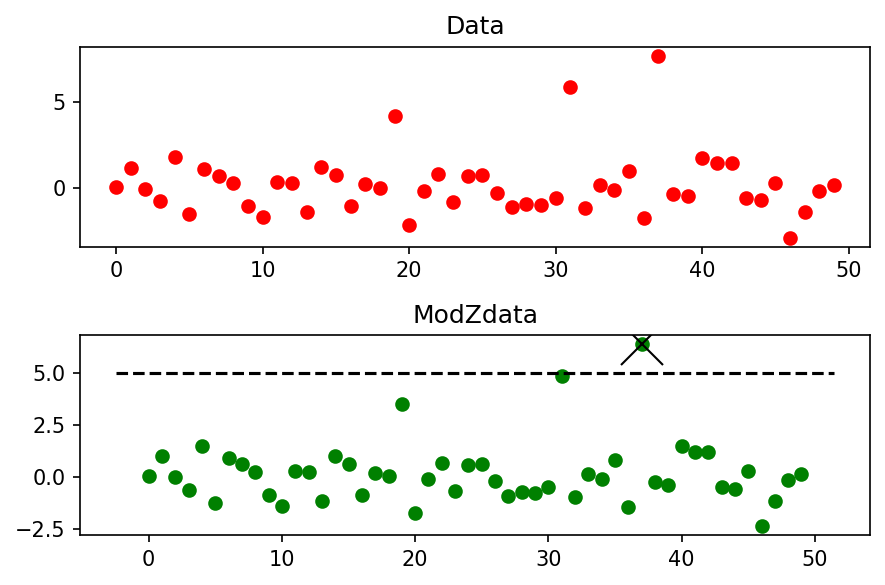

In [44]:

n = 50
data = np.random.randn(n)

# incorporating outliers
data[data>2] = data[data>2] ** 2

ModZdata= stats.norm.ppf(0.75)* (data - np.median(data)) / (stats.median_abs_deviation(data))

# threshold setting
threshold = 5

fig,ax = plt.subplots(2,1,dpi=150)

# plotting the data
ax[0].plot(data,'ro')

ax[1].plot(ModZdata,'go')

# plotting the threshold
axes = plt.gca()

ax[1].plot(axes.get_xlim(),[threshold,threshold],'k--')

# plotting the outlier markers
outliers = np.where(ModZdata > threshold)[0]
ax[1].plot(outliers,ModZdata[outliers],'x',color='black',markersize=20)


# title giving ceremony
ax[0].set_title('Data')
ax[1].set_title('ModZdata')

plt.tight_layout()
plt.show()

In [13]:
data

array([ 0.2152896 ,  0.10737757,  0.05642167, -0.51122932,  0.58554114,
        0.17133363,  1.08728262,  0.21701304, -1.82817456,  0.73625994,
        0.21383237, -0.58633513,  0.03165715,  1.40623805, -1.01810982,
       -0.34222329, -1.4073653 ,  9.51859149, -0.01107296,  0.66083886,
        0.46331076,  0.80581995,  0.13480373,  0.74399868, -1.24583078,
        0.76938205, -0.1548608 ,  0.72207965, -0.70762057, -0.26196215,
       -2.13093434, -1.23766795,  0.11126212, -0.96929118, -0.74829903,
        0.10086524,  0.74007142,  0.59797762,  0.46059192,  0.7130379 ,
       -0.71985867, -0.28377721,  0.25588176, -0.5641591 , -0.11498162,
       -0.69028551, -0.32622682,  0.9572979 , -0.60884826, -0.61642977])

In [14]:
ModZdata

array([ 0.14432609,  0.03034906, -0.02347072, -0.62302548,  0.53538693,
        0.09789965,  1.06532787,  0.14614639, -2.0139872 ,  0.6945766 ,
        0.14278696, -0.70235248, -0.04962709,  1.40220959, -1.15839427,
       -0.44452079, -1.56952714,  9.97050289, -0.09475876,  0.61491662,
        0.40628682,  0.7680461 ,  0.05931666,  0.70275029, -1.39891387,
        0.72956029, -0.24662793,  0.67959934, -0.83045454, -0.35974871,
       -2.33376304, -1.39029225,  0.03445193, -1.10683187, -0.87341926,
        0.02347072,  0.69860231,  0.54852239,  0.40341518,  0.67004941,
       -0.84338047, -0.38278985,  0.18719965, -0.67893009, -0.20450741,
       -0.8121452 , -0.42762526,  0.9280376 , -0.72613091, -0.73413853])

In [20]:
axes.get_xlim()

(-2.45, 51.45)

In [36]:
outliers

array([18, 20], dtype=int64)

In [37]:
ModZdata[outliers]

array([ 5.57456959, 10.8742384 ])

In [48]:
x,y = sym.symbols('x,y')

eq = x**4 - y**4 - 360


# day 96 and day 98

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import display,Math
import sympy as sym
sym.init_printing()

In [8]:
quartile = 4

stats.norm.ppf(quartile/4)

# compare the regular z score and modified z score


# goal

1. make 4 plots: norm z, norm mod z, exp z, exp mod z


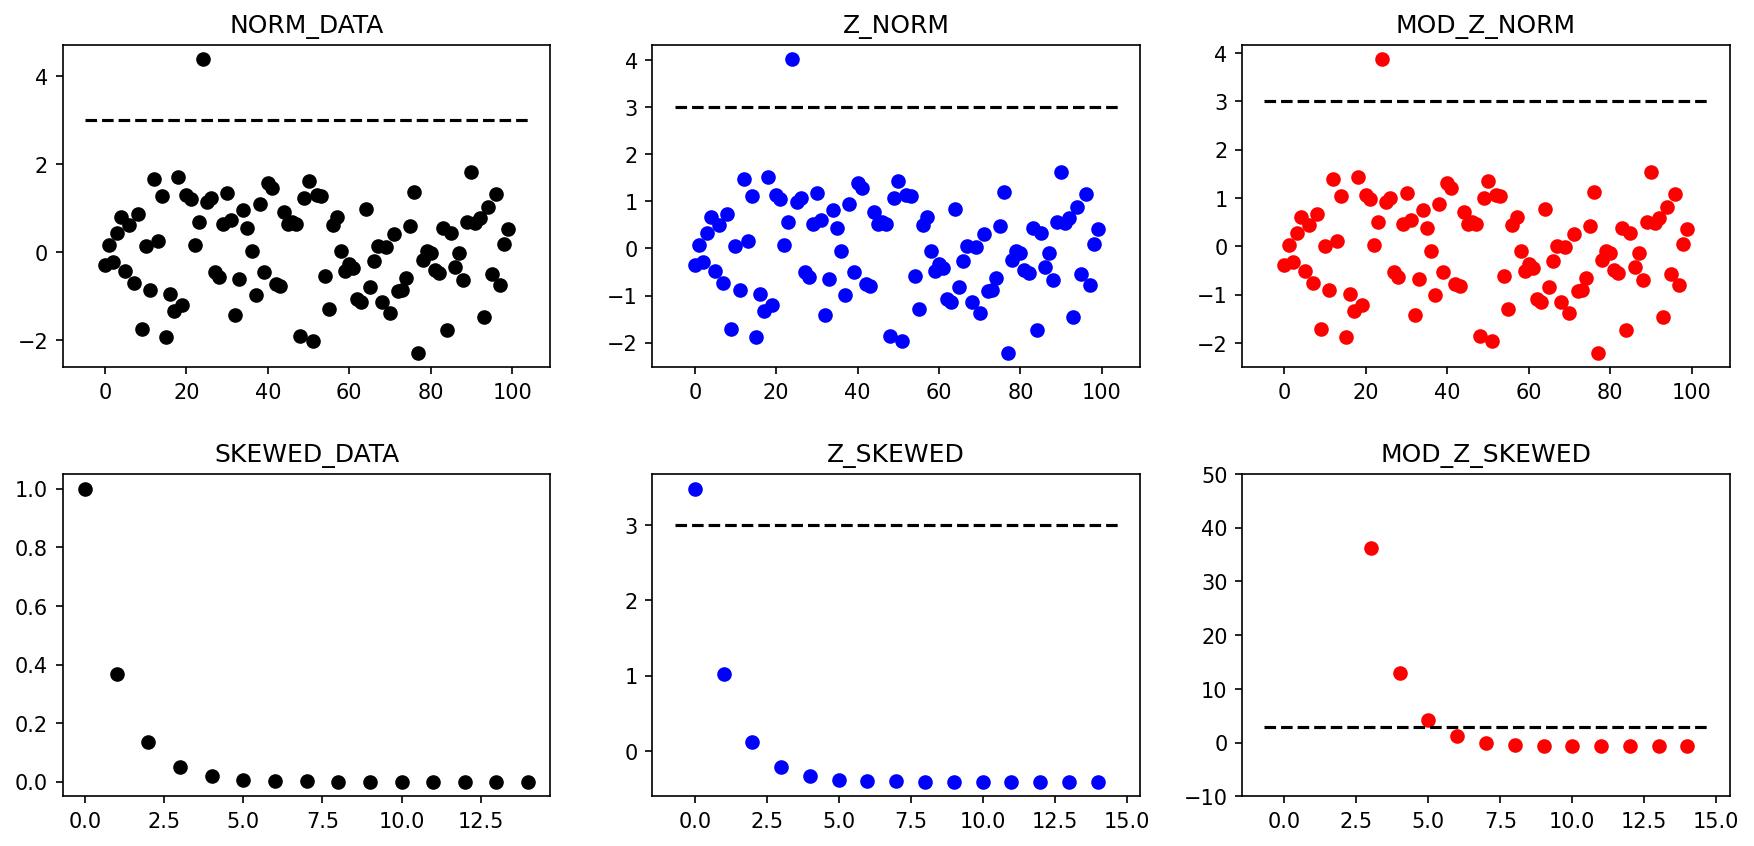

In [26]:
# norm data
norm_data = np.random.randn(100)

# adding outliers for normal
norm_data[norm_data>2] = norm_data[norm_data>2] ** 2

#skewed data
a = np.arange(0,15)
skewed_data = np.exp(-a)  # right skew

# setting the threshold
threshold = 3

# z and mod z
z_norm = (norm_data - np.mean(norm_data)) / np.std(norm_data)
mod_z_norm = stats.norm.ppf(0.75) * (norm_data - np.median(norm_data))/stats.median_abs_deviation(norm_data)

z_skewed = (skewed_data - np.mean(skewed_data))/np.std(skewed_data)
mod_z_skewed = stats.norm.ppf(0.75) * (skewed_data - np.median(skewed_data))/stats.median_abs_deviation(skewed_data)

# plotting for normal distribution

fig,ax = plt.subplots(nrows = 2, ncols = 3,figsize=(12,6),dpi=150)

ax[0][0].set_title('NORM_DATA')
ax[0][0].plot(norm_data,'ko')
ax[0][0].plot(ax[0][0].get_xlim(),[threshold,threshold],'k--')

ax[0][1].set_title('Z_NORM')
ax[0][1].plot(z_norm,'bo')
ax[0][1].plot(ax[0][1].get_xlim(),[threshold,threshold],'k--')


ax[0][2].set_title('MOD_Z_NORM')
ax[0][2].plot(mod_z_norm,'ro')
ax[0][2].plot(ax[0][2].get_xlim(),[threshold,threshold],'k--')


# plotting for skewed distribution

ax[1][0].set_title('SKEWED_DATA')
ax[1][0].plot(skewed_data,'ko')

ax[1][1].set_title('Z_SKEWED')
ax[1][1].plot(z_skewed,'bo')
ax[1][1].plot(ax[1][1].get_xlim(),[threshold,threshold],'k--')


ax[1][2].set_title('MOD_Z_SKEWED')
ax[1][2].plot(mod_z_skewed,'ro')
ax[1][2].plot(ax[1][2].get_xlim(),[threshold,threshold],'k--')
ax[1][2].set_ylim([-10,50]) # zooming in on the removal area

plt.tight_layout(pad=2)
plt.show()

In [10]:
ax[0][0].get_xlim()

# day 99 and day 100

In [2]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt
import scipy.stats as stats

# multivariate outlier detection

# distance between two points (x1,y1) and (x2,y2) in 2d is:

# $$ \text{2d } = \sqrt{(x_2 - x_1)^{2} + (y_2 - y_1)^{2}} $$

# distance between two points  in 3d is:

# $$ \text{3d } = \sqrt{(x_2 - x_1)^{2} + (y_2 - y_1)^{2} + (z_2 - z_1)^{2}} $$


# distance between two points  in nd is:

# $$ \text{nd } = \sqrt{(x_2 - x_1)^{2} + (y_2 - y_1)^{2} + .......(n_2 - n_1)^{2}} $$



# Multivariate outlier detection Algorithm:

1. compute the data mean
2. compute the distance between each data point to the mean.
3. convert the distances to z-scores
4. detect the outliers by setting a threshold. 

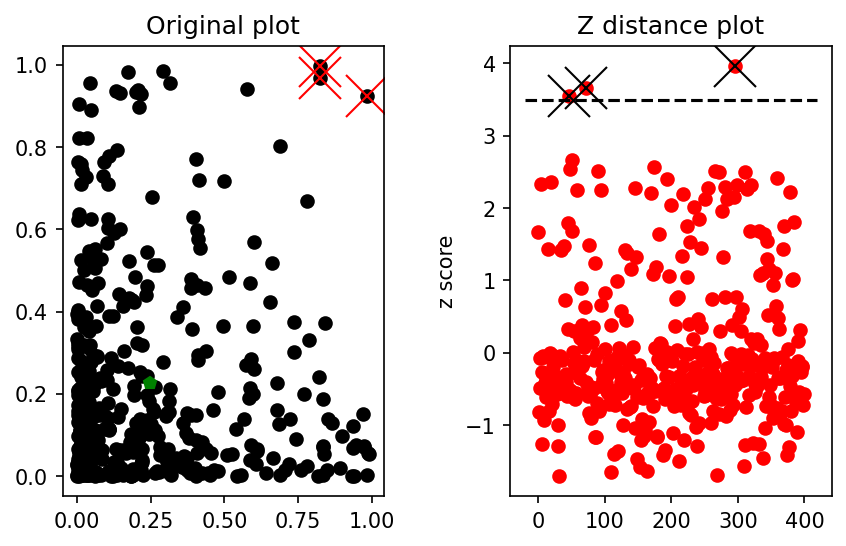

In [25]:
n = 400

# setting the x and y coordinates
x = np.exp(-abs(np.random.randn(n) * 3))
y = np.exp(-abs(np.random.randn(n) * 3))

datamean = [np.mean(x),np.mean(y)]

# finding the distance between each point and the datamean
ds = np.zeros(n)
for i in range(n):
    ds[i] = np.sqrt(  (x[i] - datamean[0])**2 + (y[i] - datamean[1])**2   )
    
    
# convert the distances to z scores
z_ds = (ds - np.mean(ds))/np.std(ds)

# setting the threshold
threshold = 3.5

# plotting
fig,ax = plt.subplots(1,2,dpi=150)

# original plot
ax[0].plot(x,y,'ko')
ax[0].plot(datamean[0],datamean[1],'gp')
ax[0].set_title('Original plot')



# z_ds plot
ax[1].plot(z_ds,'ro')
ax[1].set_ylabel('z score')
ax[1].plot(ax[1].get_xlim(),[threshold,threshold],'k--')
ax[1].set_title('Z distance plot')

# marking with x the point that go beyond the threshold
outidx = np.where(z_ds>threshold)[0] # throws out the index

ax[0].plot(x[outidx],y[outidx],'x',color='red',markersize=20)
ax[1].plot(outidx,z_ds[outidx],'x',color='black',markersize=20)

plt.tight_layout(pad=2)
plt.show()

# Removing the Outliers by Data Trimming.

# Algorithms:


1. sort the data values mean_centered


2. remove the most extreme k values or the most extreme k%


# Disadvantage:

1. can remove non-outliers also as the threshold setting pretty much subjective. 

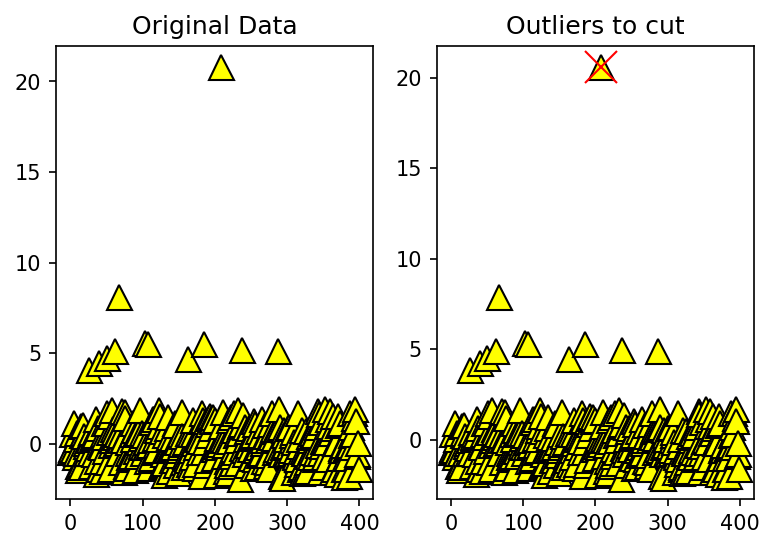

In [53]:
# setting the quantities of data
n = 400

# creating the data set
data = np.random.randn(n)

# creating outliers in the data
data[data>2] = data[data>2] ** 2
data[data<-2] = data[data<-2] ** 2


# mean-centered
data_mean = data - np.mean(data)

# trimpercent setting
datacutoff = np.percentile(abs(data_mean),99.99) # get the value for the percent

data2cut = np.where(abs(data_mean) > datacutoff)[0] # gives the index


# plotting
fig,ax = plt.subplots(1,2,dpi=150)
ax[0].plot(data,'k^',markerfacecolor='yellow',markersize=12)
ax[0].set_title('Original Data')

# data2cut plot
ax[1].plot(data_mean,'k^',markerfacecolor='yellow',markersize=12)
ax[1].plot(data2cut,data_mean[data2cut],'x',color='red',markersize=15)
ax[1].set_title('Outliers to cut')


plt.show()


In [51]:
datacutoff

In [42]:
data2cut

array([ 4, 32], dtype=int64)

# day 101

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# non parametric solutions to outliers


# first approach:

1. remove them before you do any kind of analysis.

# second approach:

1. leave outliers as they are and use robust methods to attentuate any negative impact they may have on the data.



# non linear transformation of the data

1. Rank-transform (this is the best method i guess)
2. log of data (second best) 
3. sqrt of data


log of data is second best because though it converts big numbers into a small relative number, it miserably fails at negative numbers so, if the data happens to have one of those negative numbers the logarithm of it prompt a math error.


taking rank of each number based on its size relative to other numbers is the one of the robust strategy to deal with extremely large outliers. 


### a = [1,8,-10,234,1 trillion]


### rank_of_a = [2,3,1,4,5]



# seeing how rank-transformation and log-transformation work on original data

this rank is different than the matrix rank

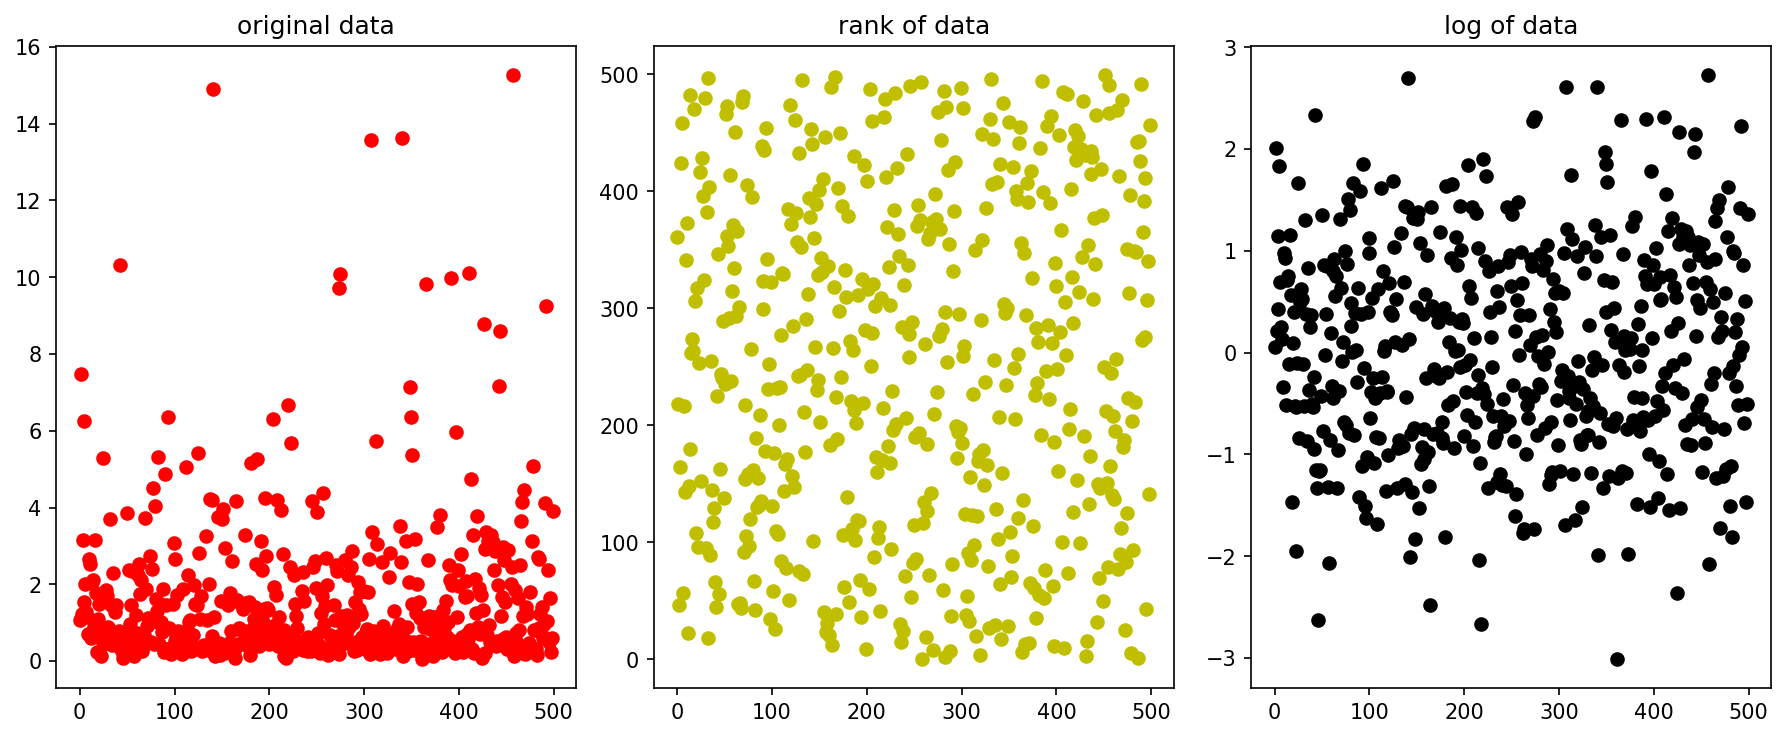

In [23]:
n = 500
x = np.random.randn(n) 

a = np.exp(-x)

rank_of_a = np.argsort(a)
log_of_a = np.log(a)


fig,ax = plt.subplots(1,3,figsize=(12,5),dpi=150)
ax[0].plot(a,'ro')
ax[0].set_title('original data')

ax[1].plot(rank_of_a,'yo')
ax[1].set_title('rank of data')

ax[2].plot(log_of_a,'ko')
ax[2].set_title('log of data')

plt.tight_layout(pad=1)
plt.show()

In [6]:
rank_of_a

In [7]:
np.argsort(a)

array([42, 21, 37, 31, 12,  7, 20, 23, 38, 14, 44, 27, 49,  6, 17, 22,  8,
       47, 29, 19, 24, 18, 26, 41, 30, 48, 28, 40, 25, 43, 16,  4,  0,  3,
        1, 15, 11, 45, 33, 36, 34, 35,  9,  2, 32, 39, 10,  5, 13, 46],
      dtype=int64)

In [26]:
np.std(rank_of_a)

In [25]:
np.mean(rank_of_a)

In [27]:
np.std(a)

In [28]:
np.mean(a)

In [29]:
np.std(log_of_a)

In [30]:
np.mean(log_of_a)